In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns 

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head(5)

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [4]:
train_df.columns = train_df.columns.str.replace(' ','_')
test_df.columns = test_df.columns.str.replace(' ','_')

In [5]:
train_df.shape

(700, 9)

In [6]:
test_df.shape

(300, 8)

In [7]:
train_df.head()

,Unnamed:_0,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


C:\Users\gauta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


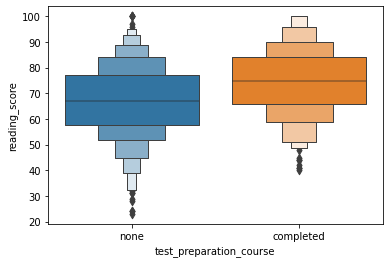

In [8]:
ax = sns.boxenplot(train_df['test_preparation_course'],train_df['reading_score'])

C:\Users\gauta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


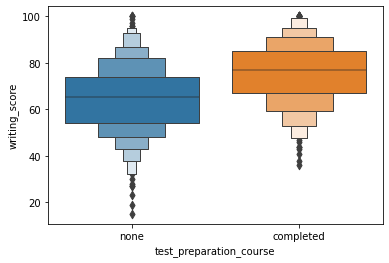

In [9]:
ax = sns.boxenplot(train_df['test_preparation_course'],train_df['writing_score'])

C:\Users\gauta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


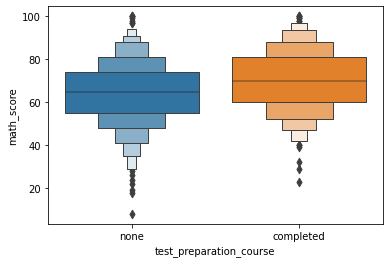

In [10]:
ax = sns.boxenplot(train_df['test_preparation_course'],train_df['math_score'])

In [11]:
train_df = train_df.drop(['Unnamed:_0','gender','ethnicity','parental_level_of_education','lunch','test_preparation_course'],1)
test_df = test_df.drop(['Unnamed:_0','gender','ethnicity','parental_level_of_education','lunch','test_preparation_course'],1)

In [12]:
train_df.head()

,reading_score,writing_score,math_score
0,61,62,61
1,62,53,53
2,75,70,67
3,76,65,79
4,58,44,53


In [13]:
#Standard Scaling
sc = StandardScaler()
cols_to_scale = ['reading_score', 'writing_score', 'math_score']
train_df[cols_to_scale] = sc.fit_transform(train_df[cols_to_scale])

In [14]:
X = train_df.drop(['math_score'], axis=1)
y = train_df['math_score']

In [15]:
mod_lin = LinearRegression()
mod_lin.fit(X,y)

LinearRegression()

In [16]:
u_predict = np.round(mod_lin.predict(test_df))

In [17]:
u_predict

array([57., 50., 78., 39., 64., 81., 47., 64., 68., 62., 64., 57., 61.,
       75., 47., 45., 52., 75., 50., 50., 66., 63., 65., 70., 43., 47.,
       31., 45., 56., 36., 36., 57., 57., 51., 72., 63., 66., 63., 64.,
       54., 58., 48., 57., 51., 41., 68., 48., 55., 59., 43., 48., 63.,
       56., 76., 72., 53., 55., 48., 70., 75., 64., 56., 65., 53., 74.,
       54., 60., 68., 55., 49., 68., 49., 61., 35., 49., 58., 69., 69.,
       32., 54., 53., 64., 64., 65., 46., 40., 45., 71., 64., 62., 70.,
       78., 59., 60., 68., 28., 47., 53., 42., 69., 56., 40., 60., 67.,
       59., 65., 59., 35., 58., 46., 61., 29., 58., 64., 44., 75., 54.,
       59., 45., 58., 48., 39., 45., 61., 64., 65., 61., 46., 64., 31.,
       71., 59., 61., 83., 31., 56., 51., 58., 36., 73., 55., 59., 67.,
       61., 24., 49., 71., 52., 71., 64., 44., 68., 54., 65., 44., 39.,
       34., 42., 71., 52., 58., 73., 66., 42., 70., 62., 71., 62., 60.,
       49., 69., 56., 34., 65., 62., 42., 60., 57., 63., 21., 49

In [18]:
output = pd.DataFrame(u_predict,columns=['math score'])

In [19]:
output.to_csv('output_u.csv')